# 1. Reading Dataset

We use **Blood Pressure** dataset.

The dataset can be downloaded from **Kaggle** from the following link: <a href="https://www.kaggle.com/pavanbodanki/blood-press">Click here to download</a>

The dataset file is called `data.CSV`.
The dataset consists of **2000 samples** with 15 columns (Patient_Number + **13 features** + **Blood_Pressure_Abnormality**). 

Our objective is to use the features to **detect a blood pressure abnormality** to either **no or yes**.

We use `pd.read_csv` function to read the dataset in a data frame called `data`. We call `data.head()` to print the first 5 rows.

In [1]:
import pandas as pd
data="data.CSV"
data = pd.read_csv(data)
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


**The Size of the dataset**

In [2]:
data.shape

(2000, 15)

**Basic info about data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

# 2. Data Preprocessing

**Checking Missing Values**

In [5]:
data.isnull().any(axis=1).sum()

1682

In [6]:
# calculate missing data of each col 

data.isnull().sum() /len(data)

Patient_Number                   0.000
Blood_Pressure_Abnormality       0.000
Level_of_Hemoglobin              0.000
Genetic_Pedigree_Coefficient     0.046
Age                              0.000
BMI                              0.000
Sex                              0.000
Pregnancy                        0.779
Smoking                          0.000
Physical_activity                0.000
salt_content_in_the_diet         0.000
alcohol_consumption_per_day      0.121
Level_of_Stress                  0.000
Chronic_kidney_disease           0.000
Adrenal_and_thyroid_disorders    0.000
dtype: float64

**Dealing with missing values**

In [8]:
# Removing column=['Pregnancy'] as it contains large amount of missing data about 1558 samples =~ 78%
data_without_pregnancy = data.drop(columns=['Pregnancy'])
data_without_pregnancy.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,0,15619,49644,397.0,2,0,0


**Filling missing values**

In [9]:
# Filling with column average
col_averages = data_without_pregnancy.mean(axis=0)
data_clean = data_without_pregnancy.fillna(col_averages)
data_clean.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0,15619,49644,397.000000,2,0,0


In [10]:
# Checking Missing values again
data_clean.isnull().any(axis=1).sum()

0

In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   2000 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Smoking                        2000 non-null   int64  
 8   Physical_activity              2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    2000 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

There are NaN values in the dataset.

**Preparing input and output**

In [37]:
data_input = data_clean.drop(columns=['Patient_Number', 'Blood_Pressure_Abnormality'])
data_input.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,11.28,0.90,34,23,1,0,45961,48071,251.008532,2,1,1
1,9.75,0.23,54,33,1,0,26106,25333,205.000000,3,0,0
2,10.79,0.91,70,49,0,0,9995,29465,67.000000,2,1,0
3,11.00,0.43,71,50,0,0,10635,7439,242.000000,1,1,0
4,14.17,0.83,52,19,0,0,15619,49644,397.000000,2,0,0


In [38]:
data_output = data_clean['Blood_Pressure_Abnormality']
data_output.head()
data_output.unique()
data_output.value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

# 3. Splitting the data into (train - validation - test)

We split (data_input, data_output) to (65% : 35%). The 35% is used for testing. And the remaining part is split again to (65% : 35%) for training and validation respectively.

In [54]:
from sklearn.model_selection import train_test_split
# splitting 35% for testing
X, X_test, y, y_test = train_test_split(
    data_input, data_output, test_size=0.35, random_state=2)

# splitting the remaining part (X, y) to training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.35, random_state=2)

In [55]:
def data_shape():
    print('X_train:', X_train.shape)
    print('y_train:', y_train.shape)
    print('------------')
    print('X_val:', X_val.shape)
    print('y_val:', y_val.shape)
    print('------------')
    print('X_test:', X_test.shape)
    print('y_test:', y_test.shape)

In [56]:
data_shape()

X_train: (845, 12)
y_train: (845,)
------------
X_val: (455, 12)
y_val: (455,)
------------
X_test: (700, 12)
y_test: (700,)


**Feature Scaling**

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Save Scaler File
import pickle
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

**Helper function: Evaluate Classifier**

In [59]:
from sklearn.metrics import accuracy_score

'''
    Calculate and return training accuracy 
    and validation accuracy of given classifier
    on given training and validation data
'''
def eval_classifier(clf, X_train, y_train, X_val, y_val):
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    print(clf.__class__.__name__)
    print('Acc Train:', acc_train)
    print('Acc Val:', acc_val)
    print('----------------------------')
    return acc_train, acc_val

# Voting Classifier

In [60]:
#import used libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier

In [61]:
tree_clf = DecisionTreeClassifier(random_state=2)
logistic_clf = LogisticRegression(random_state=2)
svc_clf = SVC(random_state=2)
gaussian_nb = GaussianNB()
estimators = [
    ('Decision Tree', tree_clf),
    ('Logistic Regression', logistic_clf),
    ('SVC', svc_clf),
    ('Naive Bayes', gaussian_nb),
    ]

voting_clf = VotingClassifier(estimators)

In [62]:
all_estimators = estimators + [('Voting', voting_clf)]

results = {
    'Model': [],
    'Acc Train': [],
    'Acc Val': []
}

for (name, clf) in all_estimators:
    acc_train, acc_val = eval_classifier(
        clf, X_train_scaled, y_train, X_val_scaled, y_val
    )
    results['Model'].append(name)
    results['Acc Train'].append(acc_train)
    results['Acc Val'].append(acc_val)

DecisionTreeClassifier
Acc Train: 1.0
Acc Val: 0.832967032967033
----------------------------
LogisticRegression
Acc Train: 0.7479289940828402
Acc Val: 0.7296703296703296
----------------------------
SVC
Acc Train: 0.8982248520710059
Acc Val: 0.8307692307692308
----------------------------
GaussianNB
Acc Train: 0.8437869822485207
Acc Val: 0.8373626373626374
----------------------------
VotingClassifier
Acc Train: 0.8840236686390532
Acc Val: 0.8219780219780219
----------------------------


# Bagging

In [63]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    LogisticRegression(random_state=2), n_estimators=100,
    max_samples=0.75, bootstrap=True, random_state=2, n_jobs=-1
)

acc_train_bag, acc_val_bag = eval_classifier(
    bagging_clf, X_train_scaled, y_train, X_val_scaled, y_val
)

BaggingClassifier
Acc Train: 0.7455621301775148
Acc Val: 0.7318681318681318
----------------------------


# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,random_state=2,max_depth=2)

acc_train_rf, acc_val_rf = eval_classifier(
    rf_clf, X_train_scaled, y_train, X_val_scaled, y_val
)

RandomForestClassifier
Acc Train: 0.8568047337278106
Acc Val: 0.8241758241758241
----------------------------


# Extremely Random Trees (Extra-Trees)

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

ex_clf = ExtraTreesClassifier(n_estimators=100,random_state=2,max_depth=2)

acc_train_ex, acc_val_ex = eval_classifier(
    ex_clf, X_train_scaled, y_train, X_val_scaled, y_val         
)

ExtraTreesClassifier
Acc Train: 0.7502958579881657
Acc Val: 0.7318681318681318
----------------------------


# Adaptive Boosting

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, random_state=2), 
    random_state=2,
    n_estimators=500,
    learning_rate=0.05 
)

acc_train_ada, acc_val_ada = eval_classifier(
    ada_clf, X_train_scaled, y_train, X_val_scaled, y_val        
)

AdaBoostClassifier
Acc Train: 0.8816568047337278
Acc Val: 0.8835164835164835
----------------------------


#  Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gbct_clf = GradientBoostingClassifier(
    random_state=2,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=2)

acc_train_gbct, acc_val_gbct = eval_classifier(
    gbct_clf, X_train_scaled, y_train, X_val_scaled, y_val
)

GradientBoostingClassifier
Acc Train: 0.9538461538461539
Acc Val: 0.8879120879120879
----------------------------


# Comparing results

In [69]:
final_results = {
    'Model': [],
    'Acc Train': [],
    'Acc Val': [] 
}

final_results['Model'] = results['Model'] + ['Bagging', 'Random Forest', 'Extra Trees', 'Adaptive Boosting', 'Gradient Boosting']
final_results['Acc Train'] = results['Acc Train'] + [acc_train_bag, acc_train_rf, acc_train_ex, acc_train_ada, acc_train_gbct]
final_results['Acc Val'] = results['Acc Val'] + [acc_val_bag, acc_val_rf, acc_val_ex, acc_val_ada, acc_val_gbct]





In [70]:
final_results_df = pd.DataFrame(final_results)

final_results_df.sort_values(by='Acc Val', ascending=False, ignore_index=True, inplace=True)

final_results_df.style.highlight_max(color='lightgreen', axis=0)

,Model,Acc Train,Acc Val
0,Gradient Boosting,0.953846,0.887912
1,Adaptive Boosting,0.881657,0.883516
2,Naive Bayes,0.843787,0.837363
3,Decision Tree,1.000000,0.832967
4,SVC,0.898225,0.830769
5,Random Forest,0.856805,0.824176
6,Voting,0.884024,0.821978
7,Bagging,0.745562,0.731868
8,Extra Trees,0.750296,0.731868
9,Logistic Regression,0.747929,0.729670


In [71]:
# Covert Dataframe to csv
final_results_df.to_csv('results.csv')

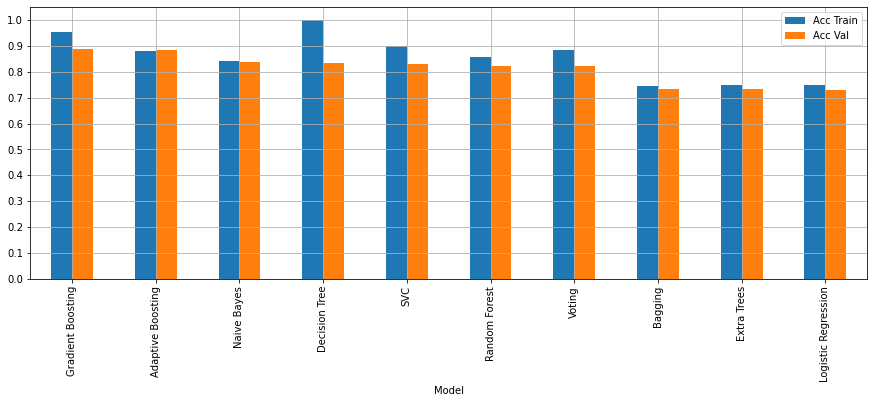

In [72]:
# Plot Models' accuracy (Training and Validation)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
final_results_df.plot.bar(x='Model', y=['Acc Train', 'Acc Val'], figsize=(15,5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

# Testing by the best model

In [78]:
# Best Model
gbct_clf = GradientBoostingClassifier(random_state=2,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=2)
# Training Model
gbct_clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=500,
                           random_state=2)

In [79]:
y_pred_test = gbct_clf.predict(X_test_scaled)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_test))

Testing Accuracy: 0.8871428571428571


In [80]:
# import used libraries for evaluation the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [81]:
def eval_model (y_actual,y_pred):
    print("Confusion Matrix:\n",confusion_matrix(y_actual, y_pred))
    print("Precision:",precision_score(y_actual, y_pred))
    print("Recall:   ",recall_score(y_actual, y_pred))
    print("F1Score:  " ,f1_score(y_actual, y_pred))
    print("Acc Test: ",accuracy_score(y_actual, y_pred))

In [82]:
eval_model(y_test, y_pred_test)

Confusion Matrix:
 [[309  32]
 [ 47 312]]
Precision: 0.9069767441860465
Recall:    0.8690807799442897
F1Score:   0.8876244665718349
Acc Test:  0.8871428571428571


# Save model

In [83]:
import pickle
with open('saved-model.pickle', 'wb') as f:
    pickle.dump(gbct_clf, f)

### Feature importances
Not all features are important. As we can see, some features are even not used at all!. We can use the array gbct_clf.feature_importances_ to know the degree of importance of each feature.

In [84]:
feature_names = ["Level_of_Hemoglobin",
                 "Genetic_Pedigree_Coefficient",
                 "Age","BMI","Sex",
                 "Smoking","Physical_activity",
                 "salt_content_in_the_diet",
                 "alcohol_consumption_per_day",
                 "Level_of_Stress",
               " Chronic_kidney_disease",
                 "Adrenal_and_thyroid_disorders"]

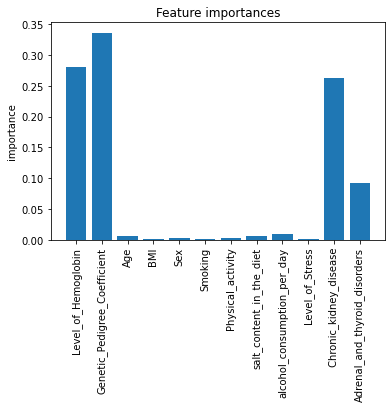

In [48]:
plt.bar(feature_names, gbct_clf.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.title('Feature importances')
plt.show()